# Fake Review Classification

In [1]:
import pandas as pd  
import re 
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
df = pd.read_csv("C:\\Users\\Rahul\\Downloads\\Sample Dataset for Analysis.csv")

In [3]:
df.columns

Index(['No.', 'Page URL', 'Store Type', 'Store Name', 'Address',
       'Rating/Review Count', 'Reviewer Name', 'Review Text',
       'Reviewer Rating', 'Review Date', 'Store Type.1', 'Review Count'],
      dtype='object')

In [4]:
def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()  # Convert text to lowercase
        text = re.sub(r'\W', ' ', text)  # Remove non-alphanumeric characters
        text = re.sub(r'\s+', ' ', text)  # Remove extra whitespaces
        text = ' '.join(word for word in text.split() if word not in stopwords.words('english'))  # Remove stopwords
    return text


In [5]:
df['processed_text'] = df['Review Text'].apply(preprocess_text)
df['processed_text']

0                                                     NaN
1                               customer friendly service
2                                                     NaN
3                                                     NaN
4                                                     NaN
                              ...                        
5995                                     great experience
5996                                                  NaN
5997    compared dmart places banglore rt nagar branch...
5998                                                  NaN
5999                                                  NaN
Name: processed_text, Length: 6000, dtype: object

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df['processed_text'], df['Reviewer Rating'], test_size=0.2, random_state=42)

In [7]:
X_train.fillna('', inplace=True)
X_test.fillna('', inplace=True)


In [8]:
X_train.dropna(inplace=True)
X_test.dropna(inplace=True)


In [9]:
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)
import pickle

with open('vectorized.pkl', 'wb') as file:
    pickle.dump(X_train_vectorized, file)

In [10]:
y_train = y_train.astype(int)
rfmodel = RandomForestClassifier(n_estimators=100, random_state=42)
model=rfmodel.fit(X_train_vectorized, y_train)

In [11]:
y_test = y_test.astype(int)
y_pred = model.predict(X_test_vectorized)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.465


In [16]:
#classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.57      0.28      0.38        89
           2       0.50      0.03      0.05        38
           3       0.21      0.03      0.05       191
           4       0.38      0.09      0.14       352
           5       0.47      0.94      0.63       528

    accuracy                           0.47      1200
   macro avg       0.35      0.23      0.21      1200
weighted avg       0.41      0.47      0.35      1200



C:\Users\Rahul\Anaconda3\envs\pratap\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rahul\Anaconda3\envs\pratap\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rahul\Anaconda3\envs\pratap\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
import pickle

# Load the saved model from file
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

# Load the saved vectorizer from file
with open('vectorizer.pkl', 'rb') as file:
    vectorizer = pickle.load(file)

# Example review
preprocessed_review = "This is a fake review."

# Vectorize the review
vectorized_review = vectorizer.transform([preprocessed_review])

# Make a prediction
prediction = model.predict(vectorized_review)

if prediction == 0:
    print("The review is classified as real.")
else:
    print("The review is classified as fake.")


The review is classified as fake.


# Senitiment Analaysis

In [18]:
sid = SentimentIntensityAnalyzer()

def classify_sentiment(review):
    review= str(review) 
    sentiment_scores = sid.polarity_scores(review)
    compound_score = sentiment_scores['compound']
    
    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['Sentiment'] = df['processed_text'].apply(classify_sentiment)

sentiment_counts = df['Sentiment'].value_counts()
print(sentiment_counts)

neutral     4493
positive    1293
negative     214
Name: Sentiment, dtype: int64


# Descriptive Analytics

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics
print(df.describe())


                No.  Rating/Review Count  Reviewer Rating  Review Count
count   6000.000000          5921.000000      6000.000000           0.0
mean   43509.386500          5996.516129         4.022333           NaN
std    27836.255081          9665.883040         1.184054           NaN
min        4.000000            53.000000         0.500000           NaN
25%    18111.000000           793.000000         4.000000           NaN
50%    42637.000000          1500.000000         4.000000           NaN
75%    67322.750000          4348.000000         5.000000           NaN
max    92884.000000         53402.000000         5.000000           NaN


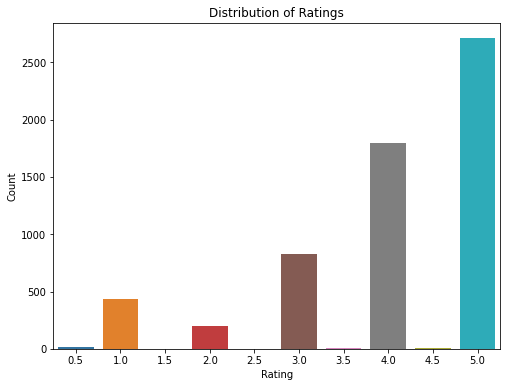

In [20]:
# Rating distribution
rating_counts = df['Reviewer Rating'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()

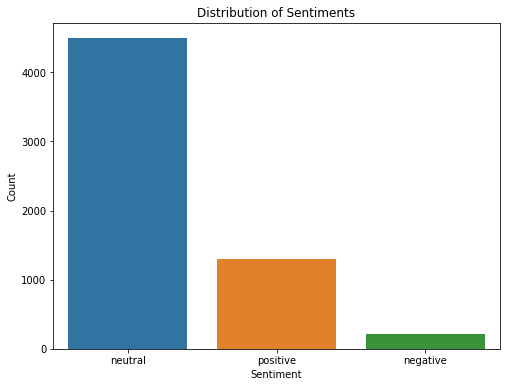

In [21]:
# Sentiment distribution
sentiment_counts = df['Sentiment'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')
plt.show()

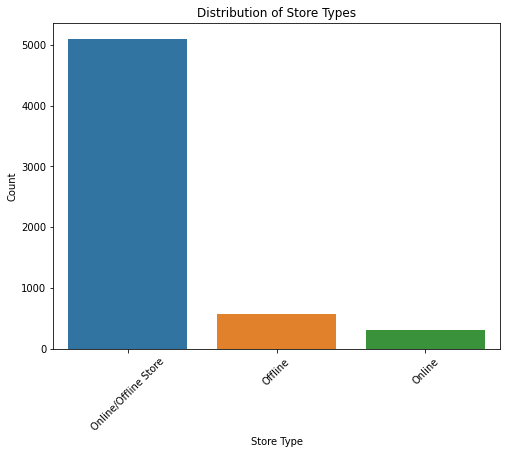

In [22]:
# Store type distribution
store_type_counts = df['Store Type'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=store_type_counts.index, y=store_type_counts.values)
plt.xlabel('Store Type')
plt.ylabel('Count')
plt.title('Distribution of Store Types')
plt.xticks(rotation=45)
plt.show()

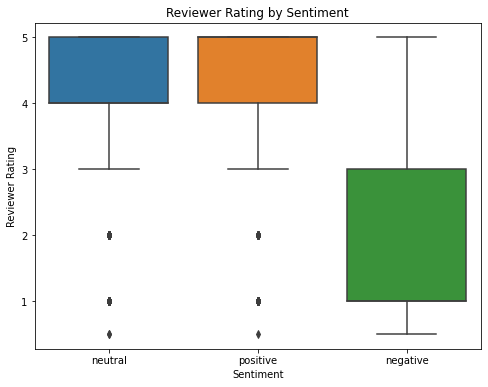

In [23]:
# Reviewer rating vs. sentiment
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Sentiment'], y=df['Reviewer Rating'])
plt.xlabel('Sentiment')
plt.ylabel('Reviewer Rating')
plt.title('Reviewer Rating by Sentiment')
plt.show()

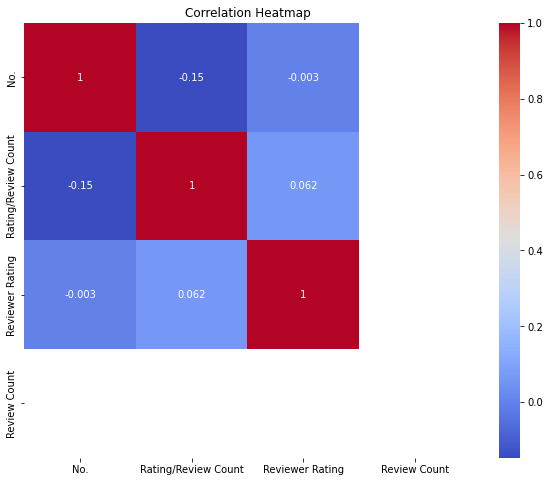

In [24]:
# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# DashBoard

In [ ]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd


# Create the app
app = dash.Dash(__name__)

# Rating distribution
rating_counts = df['Reviewer Rating'].value_counts().sort_index()
rating_fig = px.bar(x=rating_counts.index, y=rating_counts.values)
rating_fig.update_layout(title='Distribution of Ratings',xaxis_title='Rating',yaxis_title='Count')

# Sentiment distribution
sentiment_counts = df['Sentiment'].value_counts()
sentiment_fig = px.bar(x=sentiment_counts.index, y=sentiment_counts.values)
sentiment_fig.update_layout(title='Distribution of Sentiments',xaxis_title='Sentiment',yaxis_title='Count')

# Store type distribution
store_type_counts = df['Store Type'].value_counts()
store_type_fig = px.bar(x=store_type_counts.index, y=store_type_counts.values)
store_type_fig.update_layout(title='Distribution of Store Types',xaxis_title='Store Type',yaxis_title='Count')

# Reviewer rating vs. sentiment
rating_sentiment_fig = px.box(df, x='Sentiment', y='Reviewer Rating')
rating_sentiment_fig.update_layout(title='Reviewer Rating by Sentiment',xaxis_title='Sentiment',yaxis_title='Reviewer Rating')

# Layout of the dashboard
app.layout = html.Div([html.H1('Descriptive Analytics Dashboard'),html.Div([dcc.Graph(figure=rating_fig),dcc.Graph(figure=sentiment_fig)], className='row'),html.Div([dcc.Graph(figure=store_type_fig),dcc.Graph(figure=rating_sentiment_fig)], className='row')])

# Run the app/
if __name__ == '__main__':
    app.run_server(port=8051)


Dash is running on http://127.0.0.1:8051/

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:8051
Press CTRL+C to quit
127.0.0.1 - - [02/Jun/2023 23:50:03] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [02/Jun/2023 23:50:03] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [02/Jun/2023 23:50:03] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [02/Jun/2023 23:50:03] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 304 -
127.0.0.1 - - [02/Jun/2023 23:50:03] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 304 -
